# Introduction aux classes et objets 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

> Jusqu'ici, dans tous les exemples que nous avons vus, nous avons utilisé le module `matplotlib.pyplot` pour créer et manipuler les graphiques, mais ce n'est pas la seule manière d'utiliser Matplotlib.
> 
> La méthode orientée objet est la méthode la plus adaptée en Python pour interagir avec Matplotlib. C'est la manière la plus puissante de coder avec Matplotlib parce qu'elle permet un contrôle complet du résultat, bien qu'elle soit aussi la plus complexe.
>
> Aucune référence à un objet n'a été faite jusqu'ici, nous avons juste utilisé des commandes `pyplot`, et les changements sont apparus dans la figure. Les objets les plus récurrents sont les objets de classes `Figures` et `Axes`.
>
> Dans la suite nous utiliserons principalement les objets , mais également `pyplot` pour certaines instructions élémentaires.
>
> Avec le module `pyplot`, lorsque la fonction `plot` est appelé , une figure (objet `Figure`) est automatiquement créée, par un appel invisible à la méthode `figure`. De même, un graphique (objet `Axes`) est automatiquement intégré à celui-ci.
>
> Par exemple :

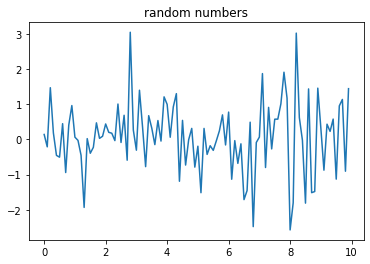

In [2]:
x = np.arange(0, 10, 0.1)
y = np.random.randn(len(x))
plt.plot(x, y)
plt.title('random numbers')
plt.show()

> Il est possible d'utiliser ces fonctions explicitement, afin de retourner des objets et ainsi pouvoir les manipuler plus facilement et directement.
>
> Voici le même code retranscrit dans le style orienté objet:

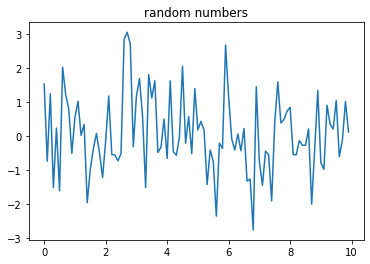

In [3]:
x = np.arange(0, 10, 0.1)
y = np.random.randn(len(x))

# Création de l'objet Figure
fig = plt.figure()

# Création de l'objet Axes
ax = fig.add_subplot(111)
l, = ax.plot(x, y)
t = ax.set_title('random numbers')

> Ici, on crée une figure appelé `fig`, à laquelle on ajoute un graphique `ax` grâce à la méthode `add_subplot`.
>
> La fonction `plot`, que l'on applique sur le graphique `ax`, retourne une liste d'éléments `Line2D`, une pour chaque ligne (dans ce cas, il n'y en a qu'une).
> 
> Dans le code ci-dessus, `l` est une référence à l'objet `Line2D`, donc chaque opération permise sur un objet `Line2D` peut être faite en utilisant `l`, ce qui permet beaucoup plus de personnalisation.
>
> Par exemple, pour changer la couleur de la ligne, il est possible d'utiliser: `l.set_color('red')` au lieu d'utiliser l'argument dans plot donc les informations de la courbe peuvent être changées après l'appel de la fonction `plot`.

> Pour commencer un graphique il faut d'abord créer une figure. La fonction `plt.figure` retourne une figure, sur laquelle on peut rajouter un ou plusieurs graphiques (objets `Axes`). Les arguments `figsize` et `facecolor` de la fonction permettent de modifier respectivement la taille et la couleur de fond de la figure.
>
> La fonction `fig.add_subplot(111)` retourne une grille sur laquelle on peut afficher un graphique. C'est la manière la plus courante d'ajouter un `Axes` à une figure, mais `add.subplot` fait plus que créer un graphique, elle ajoute un 'subplot', qui fonctionne comme on l'a vu précédemment en prenant 3 paramètres: `numrows`, `numcols`, `fignum`.
>
> `numrows` représente le nombre de lignes de subplots à préparer.
> 
> `numcols` représente le nombre de colonnes de subplots à préparer.
>
> `fignum` varie de 1 à `numrows`$\times$`numcols` et représente le numéro du subplot à utiliser.
> 
> Exemples : 
>
> `ax1 = fig.add_subplot(111)`, qui s'utilise lorsqu'un seul graphique est nécessaire.
>
> `ax2 = fig.add_subplot(212)`, qui sépare la figure en deux sous-graphiques sur deux lignes et indique que l'on souhaite travailler sur la deuxième.
>
> Une fois les objets `Axes` crées, si aucun n'est précisé, la méthode `plot` est appliquée à la dernière instance créée.
>
> Pour ajouter du contenu à l'un des graphiques, on applique les méthodes habituelles.

- En utilisant les fonctions `plt.figure` et `add.subplot`, créer une figure appelée `fig`, de taille `(8,4)`, composée de deux graphiques `ax1` et `ax2`, côte à côte, sur la même ligne.
- Sur le premier sous-graphique tracer une courbe de couleur verte passant par les points `(0,1)` , `(2,3)` , `(3,2)`.
- Sur le second afficher l'histogramme obtenu à partir de la liste d'éléments suivante: `[1, 2, 2, 2, 3, 3, 4, 5, 5]`.

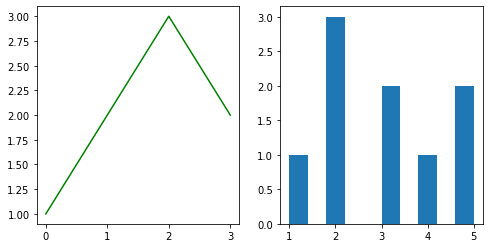

In [4]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot([0,2,3], [1,3,2], 'g')
ax2.hist([1, 2, 2, 2, 3, 3, 4, 5, 5])

plt.show()

> Matplotlib offre également la possibilité de tracer plusieurs figures, en faisant appel à la fonction `figure` plusieurs fois de suite. Les figures peuvent ensuite être utilisées exactement de la même manière que dans le cas d'une figure simple.

- Afficher les mêmes graphiques que dans la question précédente, mais sur deux figures différentes, appelées `fig1` et `fig2`.

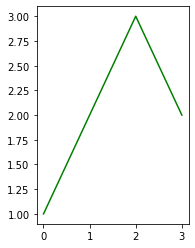

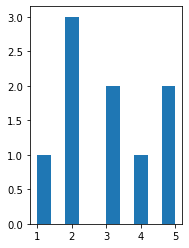

In [5]:
fig1 = plt.figure()
fig2 = plt.figure()

ax1 = fig1.add_subplot(121)
ax2 = fig2.add_subplot(122)

ax1.plot([0, 2, 3], [1, 3, 2], 'green');
ax2.hist([1, 2, 2, 2, 3, 3, 4, 5, 5]);

> Les commandes `set_xlabel` et `set_ylabel` permettent d'attribuer des labels aux axes `x` et `y` d'un graphique, de la même manière que les fonctions `xlabel` et `ylabel` de `pyplot`.
>
> Dans certaines situations, il est possible de vouloir tracer deux différentes séries de données sur le même graphique, avec différentes graduations d'axes. La fonction `twinx` permet de créer un nouveau couple d'axes au sein d'un graphique existant, avec une graduation en ordonnées différente. A l'inverse `twiny` permet de partager l'axe des ordonnées mais d'avoir des graduations différentes en abscisses.
>
> Exemple : 

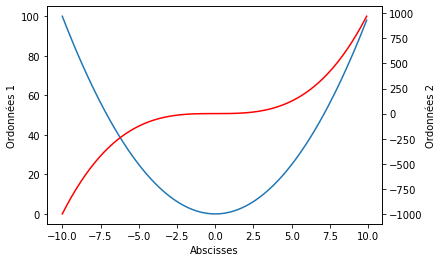

In [6]:
x = np.arange(-10, 10, 0.1)
y1 = x**2
y2 = x**3
fig = plt.figure()

# Configuration du premier systèmes d'axes
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('Ordonnées 1')
ax1.set_xlabel('Abscisses')

# Configuration du second système d'axes 
ax2 = ax1.twinx()   # la commande importante !
ax2.plot(x, y2, 'r');
ax2.set_ylabel('Ordonnées 2')

plt.show()

- Créer une séquence `x` de nombres entre 0.1 et la constante e, avec un pas de 0.01.
- Créer les séries de valeurs `y1` et `y2` correspondant respectivement à $\exp(−x)$  et $\log(x)$.
- Afficher sur la même figure `fig` les courbes relatives à `(x,y1)` et `(x,y2)` avec deux axes d'ordonnées différents, le premier avec le label `'Valeurs de y pour exp(-x)'` et le deuxième avec le label `'Valeurs de y pour ln(x)'`.

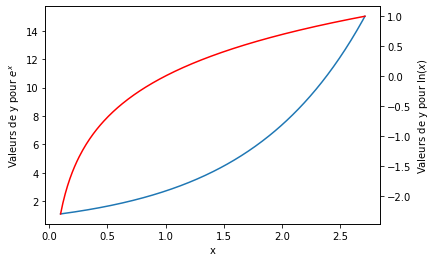

In [7]:
x = np.arange(0.1,np.e,0.01)
y1 = np.exp(x)
y2 = np.log(x)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x,y1)
ax1.set_ylabel('Valeurs de y pour $e^x$')
ax1.set_xlabel('x')

ax2 = ax1.twinx()
ax2.plot(x,y2,'r')
ax2.set_ylabel('Valeurs de y pour $\ln(x)$')

plt.show()

> Parfois il est préférable d'afficher plusieurs graphiques dans la même figure, sous forme de subplots, tout en partageant un axe, grâce aux arguments `sharex` et `sharey` de la fonction `dd_subplot`.
>
> Il est également possible d'utiliser ces deux arguments ensembles, ce qui peut s'avérer utile lorsque les différentes donnés ont les même unités de mesure.
>
> Exemple : 

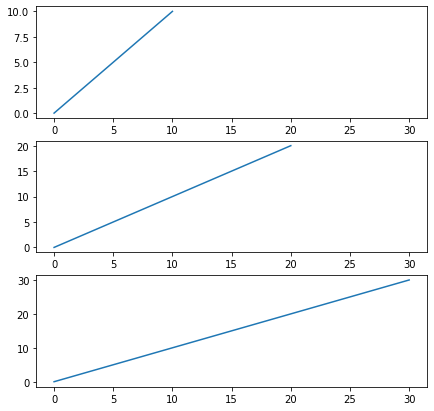

In [8]:
x = np.arange(11)
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(311)
ax1.plot(x, x)
ax2 = fig.add_subplot(312, sharex=ax1)
ax2.plot(2*x, 2*x)
ax3 = fig.add_subplot(313, sharex=ax1)
ax3.plot(3*x, 3*x)
plt.show()

> L'axe des abscisses va de 0 à 30 car les limites s'adaptent pour permettre d'afficher tous les graphiques.

- Créer une séquence de nombre allant de 0 à 10, avec un pas de 0.01.
- Créer une figure appelée `fig`, de taille `(7,10)`, dans laquelle on ajoutera 4 objet `Axes`, grâce à la fonction `add.subplot`.
- Dans le premier, `ax1`, on tracera la courbe `(x, sin(x))`.
- Dans le deuxième, `ax2`, on tracera la courbe `(-x, cos(x))`.
- Dans le troisième, `ax3`, on tracera la courbe `(2*x, sin(2*x))` en partageant l'axe des abscisses avec `ax1`.
- Dans le quatrième graphique, `ax4`, on tracera la courbe `(x, -cos(x))` en partageant l'axe des abscisses avec `ax2`.

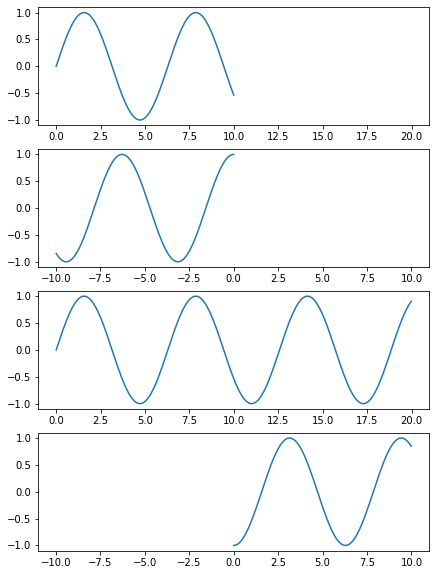

In [9]:
x = np.arange(0,10,0.01)

fig = plt.figure(figsize=(7,10))

ax1 = fig.add_subplot(411)
ax1.plot(x, np.sin(x))

ax2 = fig.add_subplot(412)
ax2.plot(-x, np.cos(x))

ax3 = fig.add_subplot(413, sharex=ax1)
ax3.plot(2*x, np.sin(2*x))

ax4 = fig.add_subplot(414, sharex=ax2)
ax4.plot(x, -np.cos(x))

plt.show()

> Les figures, graphiques, et sous-graphiques peuvent être créés en une seule commande, grâce à la fonction `plt.subplots` (faire attention au s), qui prend comme arguments le nombre de lignes et le nombre colonnes.
>
> Ici, les argument `sharex` et `sharey` sont des booléens `True` ou `False` qui permettent de paramétrer les axes des graphiques de la même manière, ou pas.
>
> Exemple : `fig,axes = plt.subplots(3,2,sharex=True,sharey=True)`.
>
> Le tableau `axes` contient tous les sous-graphiques ainsi créés. Par la suite, pour accéder au graphique de la i-ème  ligne et la j-ème colonne, il suffit d'indiquer `axes[i,j]`.

- Créer une figure et quatre sous-graphiques sur deux lignes et deux colonnes, partageant les même axes.
- Grâce à deux boucles for, ajoutez à chaque graphique, un histogramme de 500 valeurs aléatoires obtenus grâce à `np.random.randn`, avec 50 intervalles, de couleur noir et de niveau de transparence (`alpha`) 0,5.

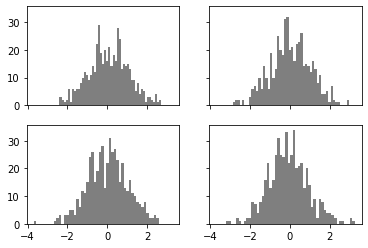

In [10]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        axes[i,j].hist(np.random.randn(500), bins=50, color='black', alpha=0.5)